Mean Absolute Error (MAE): 0.90


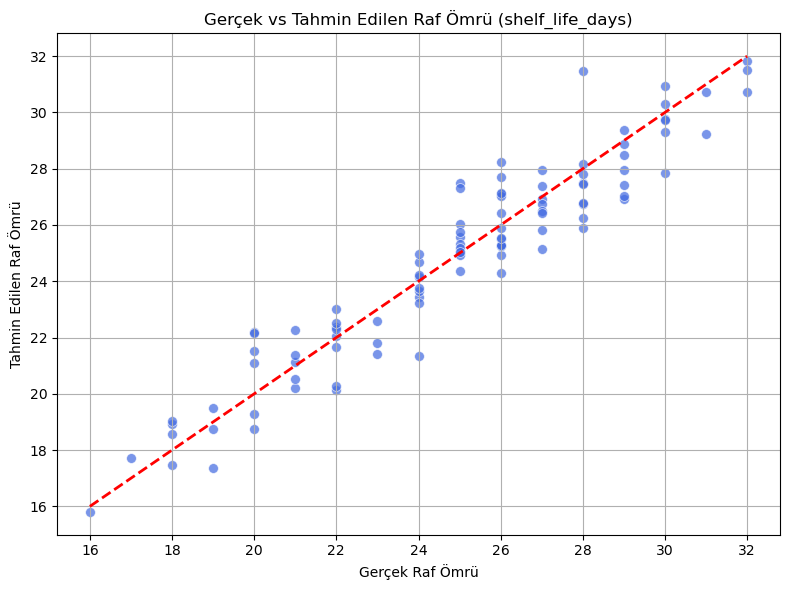

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Manuel veri seti oluşturma
np.random.seed(42)

# Ürün türleri ve ambalaj çeşitleri
product_types = ["Dairy", "Meat", "Bakery", "Produce", "Snacks"]
package_types = ["Plastic", "Glass", "Carton", "Paper"]
additives = ["None", "Preservative_A", "Preservative_B"]

# 500 örnek üret
n_samples = 500

df = pd.DataFrame({
    "product_type": np.random.choice(product_types, n_samples),
    "package_type": np.random.choice(package_types, n_samples),
    "additives": np.random.choice(additives, n_samples),
    "storage_temperature": np.random.uniform(0, 10, n_samples),
    "humidity": np.random.uniform(30, 90, n_samples),
})

# Raf ömrünü tahmini olarak oluştur (gizli formül ile)
df["shelf_life_days"] = (
    20 
    - 0.5 * df["storage_temperature"] 
    + 0.1 * df["humidity"] 
    + df["product_type"].map({"Dairy": -2, "Meat": -1, "Bakery": 1, "Produce": 2, "Snacks": 3}) 
    + df["additives"].map({"None": -2, "Preservative_A": 2, "Preservative_B": 3}) 
    + np.random.normal(0, 1, n_samples)
).round()

# Csv olarak kaydet
df.to_csv("shelf_life_dataset.csv", index=False)

# Özelliklerin ve hedef değişkenlerin belirlenmesi
numeric_features = ["storage_temperature", "humidity"]
categorical_features = ["product_type", "package_type", "additives"]

X = df[numeric_features + categorical_features]
y = df["shelf_life_days"]

# Eğitim/Test Ayrımı ve Pipeline Oluşturma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

model.fit(X_train, y_train)

# Model Başarımı (MAE)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")

# Görselleştirme: Gerçek vs Tahmin
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue', s=50, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Gerçek Raf Ömrü")
plt.ylabel("Tahmin Edilen Raf Ömrü")
plt.title("Gerçek vs Tahmin Edilen Raf Ömrü (shelf_life_days)")
plt.grid(True)
plt.tight_layout()
plt.show()